In [18]:
import os
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns
import numpy as np
from ipywidgets import interact
from sklearn.preprocessing  import MinMaxScaler

## Importation du jeu de données

In [2]:
# Definir le repertoire de travail
os.chdir("C:\INSSEDS")

# Lire le fichier CSV
df=pd.read_csv("actuarNV1.csv", sep=";")

# Afficher les 5 premieres lignes du jeu de données
df.head()

,nocontrat,exposition,zone,puissance,agevehicule,ageconducteur,bonus,marque,carburant,densite,region,nbre,no,garantie,cout
0,217,0.74,A,5,4,31,64,3,D,21,8,1,17001,1RC,0.00
1,709,0.18,B,7,8,22,100,2,E,26,0,1,17419,1RC,0.00
2,714,0.48,C,9,0,32,61,12,E,41,13,1,15851,4BG,687.82
3,852,0.27,F,7,5,39,100,12,E,11,0,1,21407,2DO,96.64
4,1083,0.51,E,4,0,49,50,12,E,31,13,1,15589,2DO,70.88


In [4]:
# informations sur l'ensemble des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nocontrat      2765 non-null   int64  
 1   exposition     2765 non-null   float64
 2   zone           2765 non-null   object 
 3   puissance      2765 non-null   int64  
 4   agevehicule    2765 non-null   int64  
 5   ageconducteur  2765 non-null   int64  
 6   bonus          2765 non-null   int64  
 7   marque         2765 non-null   int64  
 8   carburant      2765 non-null   object 
 9   densite        2765 non-null   int64  
 10  region         2765 non-null   int64  
 11  nbre           2765 non-null   int64  
 12  no             2765 non-null   int64  
 13  garantie       2765 non-null   object 
 14  cout           2765 non-null   float64
dtypes: float64(2), int64(10), object(3)
memory usage: 324.2+ KB


In [5]:
# Visualisation de nombres d'obervations uniques pour chaque variable
df.nunique()

nocontrat        2067
exposition        106
zone                6
puissance          12
agevehicule        27
ageconducteur      69
bonus              58
marque             11
carburant           2
densite            22
region             15
nbre                7
no               2765
garantie            6
cout             2126
dtype: int64

In [6]:
# Dichotomisation de la veriable nbre (0= 1accident, 1= plus de 1 & accidents)
#df['nbre']=df['nbre'].apply(lambda row:0 if row==1 else 1)
#df.nunique()

In [7]:
# Verification et suppression des doublons
df_1=df.drop_duplicates()
df_1.shape

(2765, 15)

<Axes: >

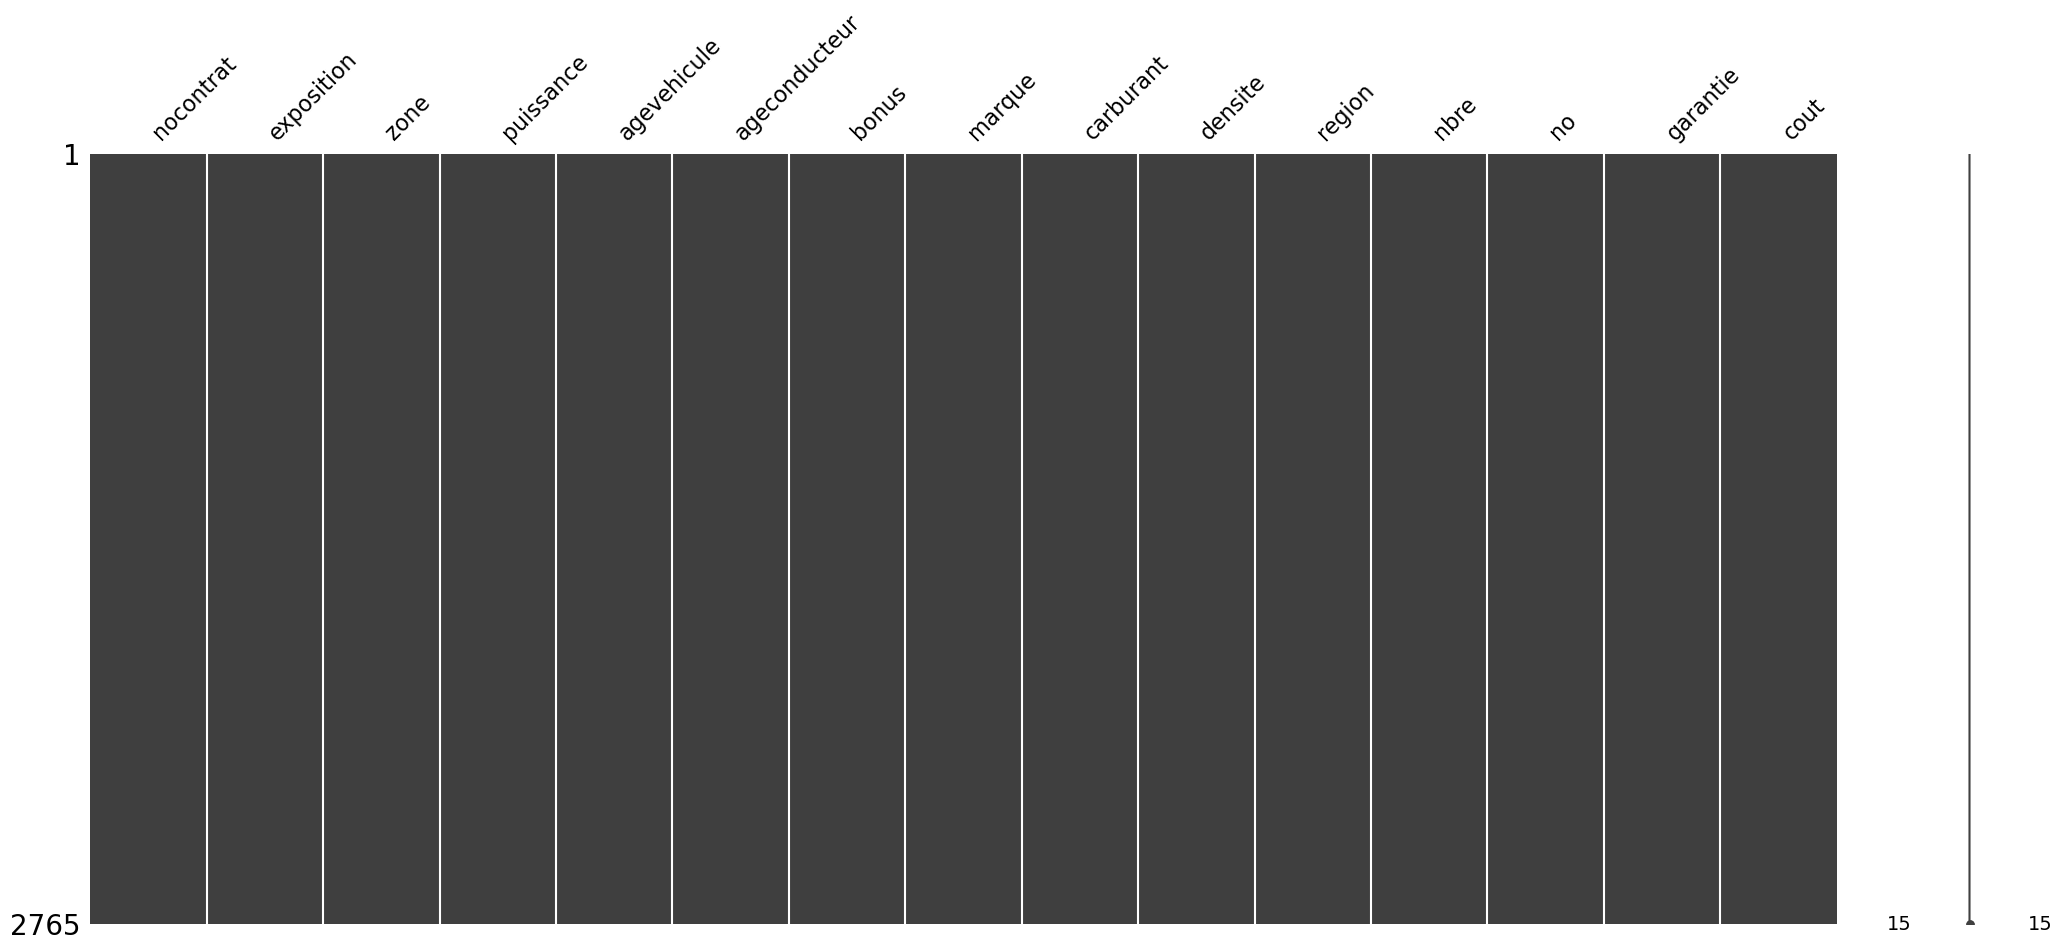

In [8]:
# Visualisation des données manquantes
msno.matrix(df)

## Analyse univariée des variables quantitatives de notre jeu de données

In [9]:
# selection des variables numeriqies
df_num=df_1[['exposition', 'puissance', 'agevehicule', 'ageconducteur', 'bonus', 'densite','nbre', 'cout']]

In [10]:
df_num.head()

,exposition,puissance,agevehicule,ageconducteur,bonus,densite,nbre,cout
0,0.74,5,4,31,64,21,1,0.00
1,0.18,7,8,22,100,26,1,0.00
2,0.48,9,0,32,61,41,1,687.82
3,0.27,7,5,39,100,11,1,96.64
4,0.51,4,0,49,50,31,1,70.88


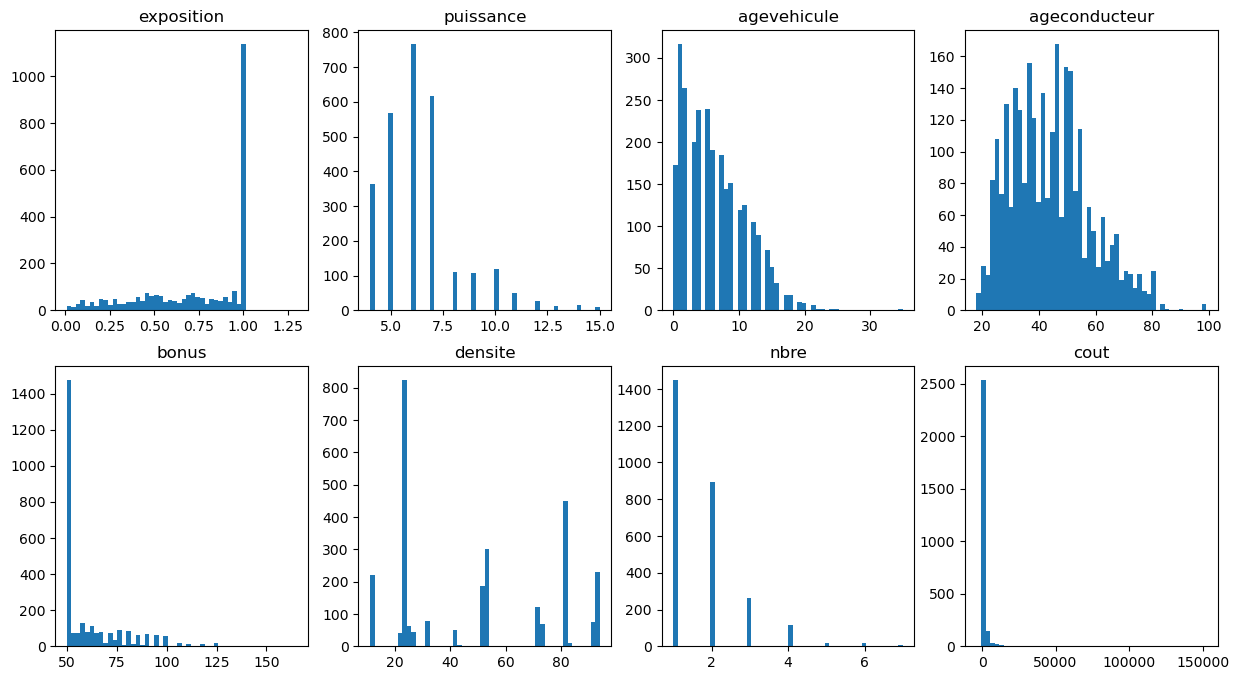

In [11]:
#Visualisation des la distribution des variables
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
axs = axs.ravel()

for i, column in enumerate(df_num.columns):
    axs[i].hist(df_num[column], bins=50)
    axs[i].set_title(column)

plt.show()


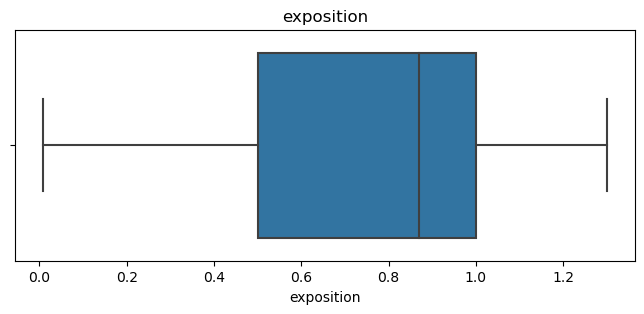

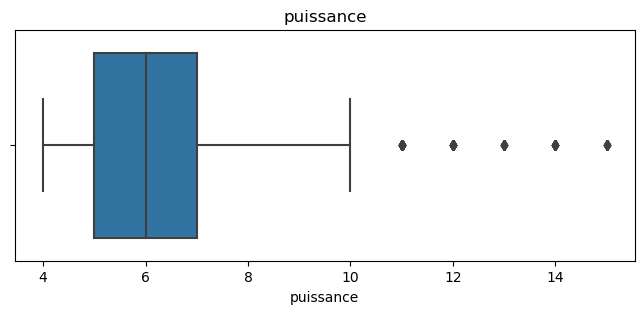

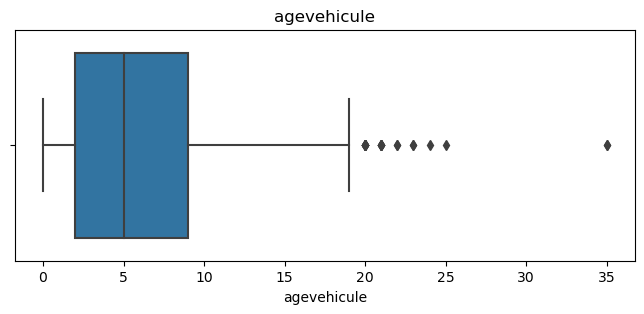

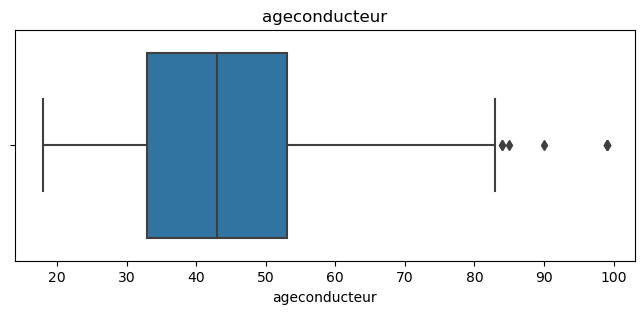

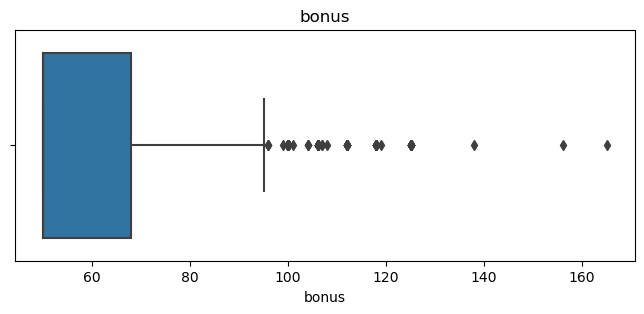

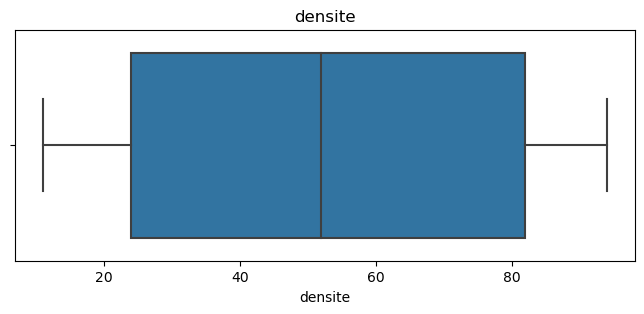

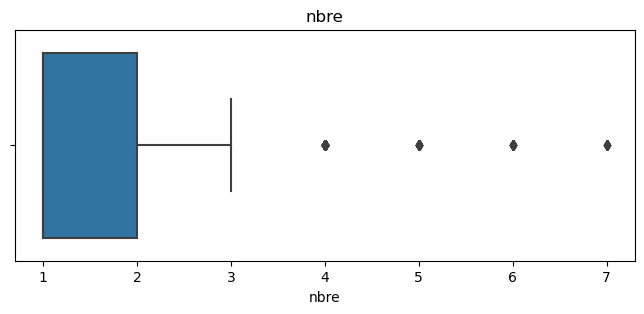

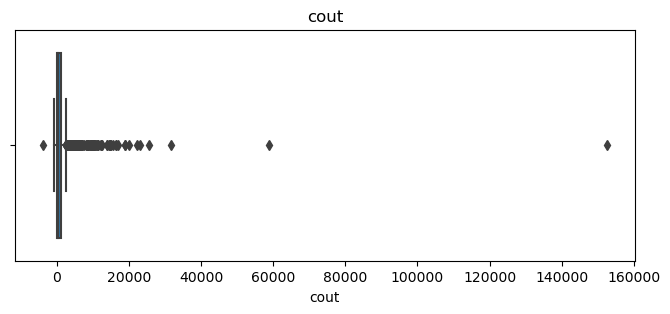

In [12]:
# Tracé des boxplots pour chaque variable
for column in df_num.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=df_num[column], ax=ax)
    plt.title(column)
    plt.show()

Sur les boites à moustache nous constatons des valeurs aberrantes pour certaines variables qui pourait affecter notre model. Pour la variables cout nous avons des valeurs negatives.

In [13]:
df_num.describe()

,exposition,puissance,agevehicule,ageconducteur,bonus,densite,nbre,cout
count,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000
mean,0.737445,6.373599,6.209403,44.093309,61.213382,49.110307,1.712477,1069.314908
std,0.298041,1.904473,4.722998,13.955868,16.673832,27.837063,0.963596,3690.147963
min,0.008219,4.000000,0.000000,18.000000,50.000000,11.000000,1.000000,-3811.230000
25%,0.500000,5.000000,2.000000,33.000000,50.000000,24.000000,1.000000,132.670000
50%,0.870000,6.000000,5.000000,43.000000,50.000000,52.000000,1.000000,405.570000
75%,1.000000,7.000000,9.000000,53.000000,68.000000,82.000000,2.000000,1128.120000
max,1.300000,15.000000,35.000000,99.000000,165.000000,94.000000,7.000000,152449.020000


In [14]:
# Afficher les observations negatives de la variable cout
# Suppression des lignes concernées.
df_num.drop(df_num[df_num['cout']<0].index, inplace=True)

C:\Users\moussa.molba\AppData\Local\Temp\ipykernel_27996\3991641481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(df_num[df_num['cout']<0].index, inplace=True)


In [15]:
# tendances centrales apres suppression.
df_num.describe()

,exposition,puissance,agevehicule,ageconducteur,bonus,densite,nbre,cout
count,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.00000,2749.000000,2749.000000
mean,0.737561,6.375409,6.208439,44.096035,61.182612,49.07239,1.712259,1078.619494
std,0.298015,1.904428,4.730648,13.947247,16.653659,27.82443,0.964319,3698.256831
min,0.008219,4.000000,0.000000,18.000000,50.000000,11.00000,1.000000,0.000000
25%,0.500000,5.000000,2.000000,33.000000,50.000000,24.00000,1.000000,137.380000
50%,0.870000,6.000000,5.000000,43.000000,50.000000,52.00000,1.000000,409.930000
75%,1.000000,7.000000,9.000000,53.000000,68.000000,82.00000,2.000000,1128.120000
max,1.300000,15.000000,35.000000,99.000000,165.000000,94.00000,7.000000,152449.020000


In [21]:
# Standarisation des variables quantitations en les metant a l'echelle 0 1
import pandas as pd
scaler = MinMaxScaler()
df_stand = pd.dataframe (scaler.fit_transform(df_num), columns=df_num.columns)

AttributeError: module 'pandas' has no attribute 'dataframe'

In [ ]:
df_stand.head()